## OpenCV形態學操作

型態學操作可以將影像作降噪及描繪骨架，是非常有用的前處理技巧。形態學操作主要包含腐蝕、膨脹、開運算、閉運算、梯度運算、禮帽運算及黑帽運算等等，而腐蝕及膨脹是形態學操作的基礎，透過腐蝕及膨脹的結合即可實現上述其他的運算。請記住，在影像處理中的腐蝕及膨脹指的是對二值化圖形中白色區域的操作。
1. 腐蝕
2. 膨脹
3. 開運算
4. 閉運算
5. 梯度運算
6. 禮帽運算
7. 黑帽運算
8. 擊中擊不中
9. 核函數

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import cv2
%matplotlib inline

In [2]:
print('openCV version:', cv2.__version__)
print('python version:', sys.version)

openCV version: 4.1.2
python version: 3.5.2 (default, Sep 14 2017, 22:51:06) 
[GCC 5.4.0 20160609]


## 腐蝕

在腐蝕過程中，必須給定一個核函數來對整張圖的所有像素做比對，檢查核函數與比對區域的關係來決定腐蝕結果。

如果核函數(非0的座標)對應的範圍座標中包含0，則在核函數的中心位置像素值就設定為0(黑色)，若都不包含0，則中心位置像素值就維持原本數值。

在OpenCV中可以使用`cv2.erode()`實現腐蝕功能，函式如下:

`dst = cv2.erode(src, kernel[, anchor[, iterations[, borderType[, borderValue]]]])`

dst為輸出的圖片，src為輸入圖片，kernel為核函數，anchor為核函數錨點位置，也就是修改像素值的位置(預設為核函數的中心點)，iterations為腐蝕操作的次數，預設為一次，borderType為邊類型，為了保持輸入與輸出為同樣尺寸，需要將圖片邊界補寬，進行核函數比對時才能獲得同樣的輸出尺寸，預設為BORDER_CONSTANT，也就是以borderValue填補，borderValue為邊界值，預設為255。

邊類型有以下類型:

`BORDER_REFLICATE`:用最邊界的像素值填充 → aaaaaa | abcdefg | gggggg

`BORDER_REFLECT`:倒映 → gfedcba | abcdefg | gfedcba

`BORDER_REFLECT_101`:倒映，與`BORDER_REFLECT`類似，不重複最邊界像素值 → gfedcb | abcdefg | fedcba

`BORDER_WRAP`: → efgabcdefg | abcdefg | abcdefgabc

`BORDER_CONSTANT`:用指定的borderValue值來填補 → borderValue borderValue | abcdef | borderValue borderValue

In [3]:
# 自訂圖片
img = np.zeros((5, 5), dtype = np.uint8)
# 下行的1可以改為其他非0數字也可以執行，也不限於二值化圖片(但是要製造完整效果最好還是使用二值化圖片)
img[1:4, 1:4] = 1
# kernel只區分0及非0(非0為關注座標)，所以1改為非0數字效果相同
kernel = np.ones((3, 1), dtype = np.uint8)
# 可自行修改kernel做實驗
# kernel = np.array([[1],[0],[0]], dtype = np.uint8)
# 關注座標中包含0則將kernel中心位置座標改為0，未包含0則維持原本數值
erosion = cv2.erode(img, kernel)
print('img:\n', img)
print('kernel:\n', kernel)
print('erosion:\n', erosion)

img:
 [[0 0 0 0 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 0 0 0 0]]
kernel:
 [[1]
 [1]
 [1]]
erosion:
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 1 1 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


原圖:


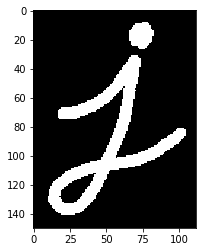

以3*3 kernel腐蝕:


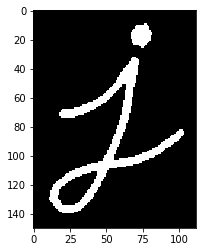

In [4]:
# 讀取外部圖片
img_j = cv2.imread('data/j.png', 0)
kernel = np.ones((3, 3), dtype = np.uint8)
erosion = cv2.erode(img_j, kernel)

print('原圖:')
plt.imshow(img_j, cmap = 'gray')
plt.show()
print('以3*3 kernel腐蝕:')
plt.imshow(erosion, cmap = 'gray')
plt.show()

原圖:


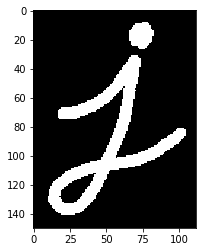

以10*10 kernel腐蝕:


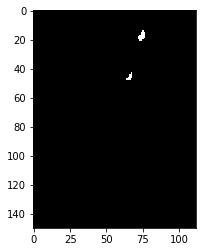

In [5]:
# 如果kernel太大有可能造成整個圖案消失
kernel = np.ones((10, 10), dtype = np.uint8)
erosion = cv2.erode(img_j, kernel)

print('原圖:')
plt.imshow(img_j, cmap = 'gray')
plt.show()
print('以10*10 kernel腐蝕:')
plt.imshow(erosion, cmap = 'gray')
plt.show()

原圖:


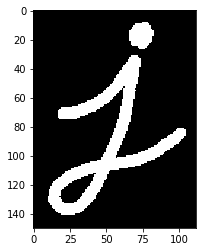

以3*3 kernel腐蝕3次:


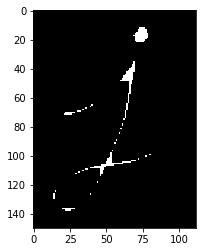

In [6]:
# 嘗試使用iterations重複腐蝕
kernel = np.ones((3, 3), dtype = np.uint8)
erosion = cv2.erode(img_j, kernel, iterations = 3)

print('原圖:')
plt.imshow(img_j, cmap = 'gray')
plt.show()
print('以3*3 kernel腐蝕3次:')
plt.imshow(erosion, cmap = 'gray')
plt.show()

原圖:


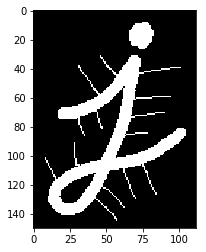

以3*3 kernel腐蝕:


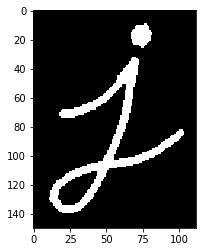

In [7]:
# 腐蝕的特色是，可以消除外部細小雜訊或汙點
# 讀取外部圖片
img_j_outside = cv2.imread('data/j_outside.png', 0)
kernel = np.ones((3, 3), dtype = np.uint8)
erosion = cv2.erode(img_j_outside, kernel)

print('原圖:')
plt.imshow(img_j_outside, cmap = 'gray')
plt.show()
print('以3*3 kernel腐蝕:')
plt.imshow(erosion, cmap = 'gray')
plt.show()

## 膨脹

與腐蝕不同的是如果核函數(非0的座標)對應的範圍座標中包含非0數值，則在核函數的中心位置像素值就設定為原本數值，若範圍座標都為0，則中心位置像素值就設定為0(黑色)。

在OpenCV中可以使用`cv2.dilate()`實現膨脹功能，函式如下:

`dst = cv2.dilate(src, kernel[, anchor[, iterations[, borderType[, borderValue]]]])`

dst為輸出的圖片，src為輸入圖片，kernel為核函數，anchor為核函數錨點位置，也就是修改像素值的位置(預設為核函數的中心點)，iterations為膨脹操作的次數，預設為一次，borderType為邊類型，為了保持輸入與輸出為同樣尺寸，需要將圖片邊界補寬，進行核函數比對時才能獲得同樣的輸出尺寸，預設為BORDER_CONSTANT，也就是以borderValue填補，borderValue為邊界值，預設為255。

邊類型有以下類型:

`BORDER_REFLICATE`:用最邊界的像素值填充 → aaaaaa | abcdefg | gggggg

`BORDER_REFLECT`:倒映 → gfedcba | abcdefg | gfedcba

`BORDER_REFLECT_101`:倒映，與`BORDER_REFLECT`類似，不重複最邊界像素值 → gfedcb | abcdefg | fedcba

`BORDER_WRAP`: → efgabcdefg | abcdefg | abcdefgabc

`BORDER_CONSTANT`:用指定的borderValue值來填補 → borderValue borderValue | abcdef | borderValue borderValue

In [8]:
# 自訂圖片
img = np.zeros((5, 5), dtype = np.uint8)
# 下行的1可以改為其他非0數字也可以執行，也不限於二值化圖片(但是要製造完整效果最好還是使用二值化圖片)
img[1:4, 1:4] = 1
# kernel只區分0及非0(非0為關注座標)，所以1改為非0數字效果相同
kernel = np.ones((3, 1), dtype = np.uint8)
# 可自行修改kernel做實驗
# kernel = np.array([[1],[0],[0]], dtype = np.uint8)
# 關注座標中包含0則將kernel中心位置座標改為0，未包含0則維持原本數值
dilation = cv2.dilate(img, kernel)
print('img:\n', img)
print('kernel:\n', kernel)
print('dilation:\n', dilation)

img:
 [[0 0 0 0 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 0 0 0 0]]
kernel:
 [[1]
 [1]
 [1]]
dilation:
 [[0 1 1 1 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 1 1 1 0]]


原圖:


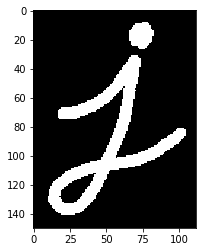

以3*3 kernel膨脹:


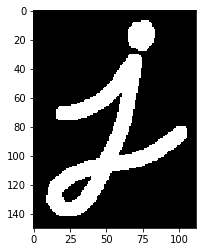

In [9]:
# 讀取外部圖片
img_j = cv2.imread('data/j.png', 0)
kernel = np.ones((3, 3), dtype = np.uint8)
dilation = cv2.dilate(img_j, kernel)

print('原圖:')
plt.imshow(img_j, cmap = 'gray')
plt.show()
print('以3*3 kernel膨脹:')
plt.imshow(dilation, cmap = 'gray')
plt.show()

原圖:


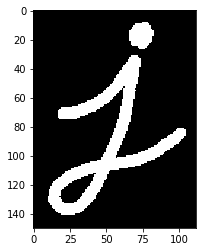

以3*3 kernel膨脹3次:


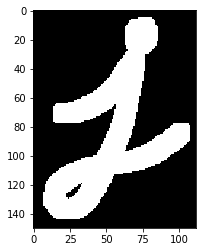

In [10]:
# 嘗試使用iterations重複膨脹
kernel = np.ones((3, 3), dtype = np.uint8)
dilation = cv2.dilate(img_j, kernel, iterations = 3)

print('原圖:')
plt.imshow(img_j, cmap = 'gray')
plt.show()
print('以3*3 kernel膨脹3次:')
plt.imshow(dilation, cmap = 'gray')
plt.show()

原圖:


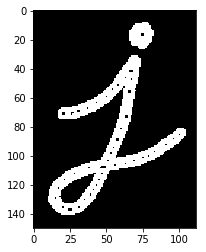

以3*3 kernel膨脹:


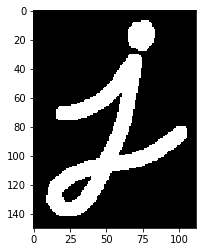

In [11]:
# 膨脹的特色是，可以消除內部細小雜訊或汙點
# 讀取外部圖片
img_j_inside = cv2.imread('data/j_inside.png', 0)
kernel = np.ones((3, 3), dtype = np.uint8)
dilation = cv2.dilate(img_j_inside, kernel)

print('原圖:')
plt.imshow(img_j_inside, cmap = 'gray')
plt.show()
print('以3*3 kernel膨脹:')
plt.imshow(dilation, cmap = 'gray')
plt.show()

## 通用形態學函式

形態學操作基本上都是腐蝕與膨脹的組合，OpenCV提供通用函式`cv2.morphologyEx()`進行此篇所有形態學操作，函式如下:

`dst = cv2.morphologyEx(src, op, kernel[, anchor[, iterations[, borderType[, borderValue]]]])`

dst為輸出的圖片，src為輸入圖片，op為操作類型，kernel為核函數，anchor為核函數錨點位置，也就是修改像素值的位置(預設為核函數的中心點)，iterations為操作的次數，預設為一次，borderType為邊類型，為了保持輸入與輸出為同樣尺寸，需要將圖片邊界補寬，進行核函數比對時才能獲得同樣的輸出尺寸，預設為BORDER_CONSTANT，也就是以borderValue填補，borderValue為邊界值，預設為255。

op操作類型有以下數種:

`cv2.MORPH_ERODE`:腐蝕。

`cv2.MORPH_DILATE`:膨脹。

`cv2.MORPH_OPEN`:開運算→先腐蝕後膨脹。

`cv2.MORPH_CLOSE`:閉運算→先膨脹後腐蝕。

`cv2.MORPH_GRADIENT`:梯度運算→膨脹圖減腐蝕圖。

`cv2.MORPH_TOPHAT`:禮帽運算→原始影像減開運算影像。

`cv2.MORPH_BLACKHAT`:黑帽運算→閉運算影像減原始影像。

`cv2.MORPH_HITMISS`:擊中擊不中→設定要搜尋的圖案進行搜尋。

邊類型有以下類型:

`BORDER_REFLICATE`:用最邊界的像素值填充 → aaaaaa | abcdefg | gggggg

`BORDER_REFLECT`:倒映 → gfedcba | abcdefg | gfedcba

`BORDER_REFLECT_101`:倒映，與`BORDER_REFLECT`類似，不重複最邊界像素值 → gfedcb | abcdefg | fedcba

`BORDER_WRAP`: → efgabcdefg | abcdefg | abcdefgabc

`BORDER_CONSTANT`:用指定的borderValue值來填補 → borderValue borderValue | abcdef | borderValue borderValue

原圖:


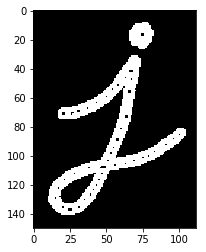

以dilate函式進行3*3 kernel膨脹:


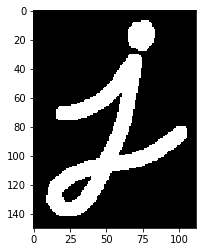

以morphologyEx函式進行3*3 kernel膨脹:


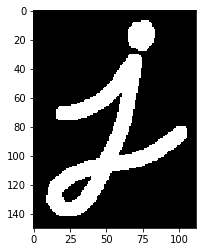

兩圖是否完全相等: True


In [12]:
# 比較通用函式與膨脹函式進行膨脹
kernel = np.ones((3, 3), dtype = np.uint8)
dilation = cv2.dilate(img_j_inside, kernel)
dilation_Ex = cv2.morphologyEx(img_j_inside, cv2.MORPH_DILATE, kernel)

print('原圖:')
plt.imshow(img_j_inside, cmap = 'gray')
plt.show()
print('以dilate函式進行3*3 kernel膨脹:')
plt.imshow(dilation, cmap = 'gray')
plt.show()
print('以morphologyEx函式進行3*3 kernel膨脹:')
plt.imshow(dilation_Ex, cmap = 'gray')
plt.show()
print('兩圖是否完全相等:', (dilation == dilation_Ex).all())

## 開運算

已知腐蝕可以將外部雜訊去除，不過腐蝕過後的圖像變小，可以再進行膨脹使大小復原，先進行腐蝕再進行膨脹就是開運算。

開運算也可以使前景物體(非0的像素點)斷開。

原圖:


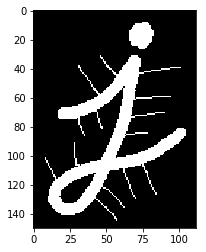

以3*3 kernel開運算:


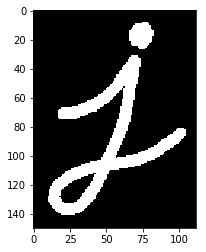

In [13]:
# 將外部雜訊去除並維持大小
kernel = np.ones((3, 3), dtype = np.uint8)
morph_open = cv2.morphologyEx(img_j_outside, cv2.MORPH_OPEN, kernel)

print('原圖:')
plt.imshow(img_j_outside, cmap = 'gray')
plt.show()
print('以3*3 kernel開運算:')
plt.imshow(morph_open, cmap = 'gray')
plt.show()

原圖:


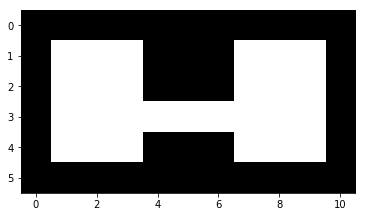

以3*3 kernel開運算:


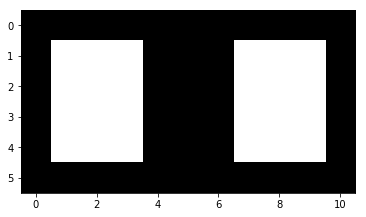

In [14]:
# 自訂一張11*6的二值化圖片(通道數為一)
img_gray = np.array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
                     [  0, 255, 255, 255,   0,   0,   0, 255, 255, 255,   0],
                     [  0, 255, 255, 255,   0,   0,   0, 255, 255, 255,   0],
                     [  0, 255, 255, 255, 255, 255, 255, 255, 255, 255,   0],
                     [  0, 255, 255, 255,   0,   0,   0, 255, 255, 255,   0],
                     [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=np.uint8)

# 進行開運算
kernel = np.ones((3, 3), dtype = np.uint8)
morph_open = cv2.morphologyEx(img_gray, cv2.MORPH_OPEN, kernel)

print('原圖:')
plt.imshow(img_gray, cmap = 'gray')
plt.show()
print('以3*3 kernel開運算:')
plt.imshow(morph_open, cmap = 'gray')
plt.show()

## 閉運算

已知膨脹可以將內部雜訊去除，不過膨脹過後的圖像變大，可以再進行腐蝕使大小復原，先進行膨脹再進行腐蝕就是閉運算。

開運算也可以使兩前景物體(非0的像素點)黏合。

原圖:


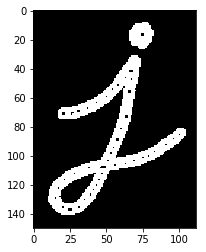

以3*3 kernel開運算:


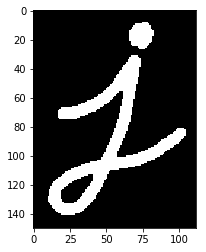

In [15]:
# 將內部雜訊去除並維持大小
kernel = np.ones((3, 3), dtype = np.uint8)
morph_close = cv2.morphologyEx(img_j_inside, cv2.MORPH_CLOSE, kernel)

print('原圖:')
plt.imshow(img_j_inside, cmap = 'gray')
plt.show()
print('以3*3 kernel開運算:')
plt.imshow(morph_close, cmap = 'gray')
plt.show()

原圖:


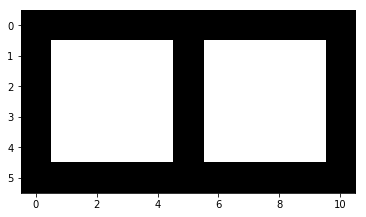

以3*3 kernel閉運算:


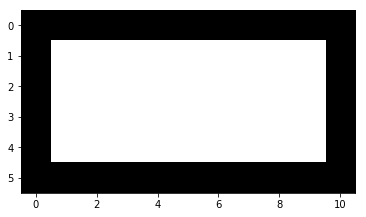

In [16]:
# 自訂一張11*6的二值化圖片(通道數為一)
img_gray = np.array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
                     [  0, 255, 255, 255, 255,   0, 255, 255, 255, 255,   0],
                     [  0, 255, 255, 255, 255,   0, 255, 255, 255, 255,   0],
                     [  0, 255, 255, 255, 255,   0, 255, 255, 255, 255,   0],
                     [  0, 255, 255, 255, 255,   0, 255, 255, 255, 255,   0],
                     [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=np.uint8)

# 進行閉運算
kernel = np.ones((3, 3), dtype = np.uint8)
# 預設borderValue為255，會影響閉運算計算(膨脹時會與補上的border相黏)，所以將borderValue改為0
morph_close = cv2.morphologyEx(img_gray, cv2.MORPH_CLOSE, kernel, borderValue = 0)

print('原圖:')
plt.imshow(img_gray, cmap = 'gray')
plt.show()
print('以3*3 kernel閉運算:')
plt.imshow(morph_close, cmap = 'gray')
plt.show()

## 梯度運算

以膨脹圖減去腐蝕圖，可以獲得圖像邊界。

原圖:


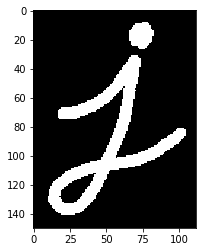

以3*3 kernel梯度運算:


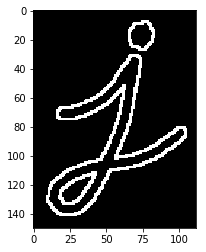

In [17]:
# 梯度運算
kernel = np.ones((3, 3), dtype = np.uint8)
morph_gradient = cv2.morphologyEx(img_j, cv2.MORPH_GRADIENT, kernel)

print('原圖:')
plt.imshow(img_j, cmap = 'gray')
plt.show()
print('以3*3 kernel梯度運算:')
plt.imshow(morph_gradient, cmap = 'gray')
plt.show()

## 禮帽運算

以原圖減去開運算圖，可以方便觀察開運算所去除的外部雜訊。

原圖:


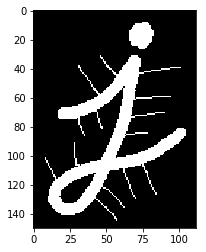

以3*3 kernel禮帽運算:


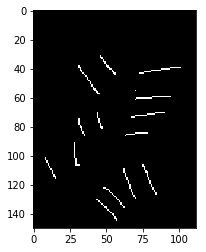

In [18]:
# 禮帽運算
kernel = np.ones((3, 3), dtype = np.uint8)
morph_tophat = cv2.morphologyEx(img_j_outside, cv2.MORPH_TOPHAT, kernel)

print('原圖:')
plt.imshow(img_j_outside, cmap = 'gray')
plt.show()
print('以3*3 kernel禮帽運算:')
plt.imshow(morph_tophat, cmap = 'gray')
plt.show()

## 黑帽運算

以閉運算圖減去原圖，可以方便觀察閉運算所去除的內部雜訊。

原圖:


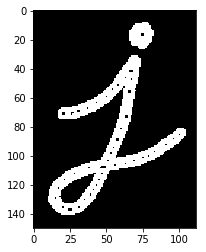

以3*3 kernel黑帽運算:


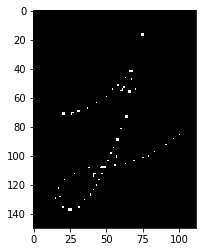

In [19]:
# 黑帽運算
kernel = np.ones((3, 3), dtype = np.uint8)
morph_blackhat = cv2.morphologyEx(img_j_inside, cv2.MORPH_BLACKHAT, kernel)

print('原圖:')
plt.imshow(img_j_inside, cmap = 'gray')
plt.show()
print('以3*3 kernel黑帽運算:')
plt.imshow(morph_blackhat, cmap = 'gray')
plt.show()

## 擊中擊不中

腐蝕的kernel中，非0座標代表的就是比對區域的該座標不可為0，而擊中擊不中可以多設定-1的值來代表比對區域的該座標必須為0。

如果用單純腐蝕的邏輯可以分為三步驟:

1. 用kernel_A腐蝕圖像img
2. 用kernel_B腐蝕圖像img的補集(黑白轉換)
3. 將兩個結果進行逐位元and計算

原圖:


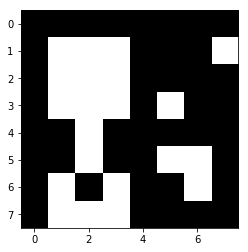

步驟一腐蝕圖:


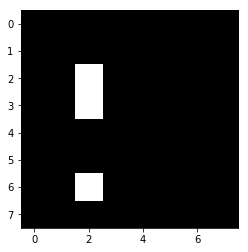

步驟二腐蝕圖:


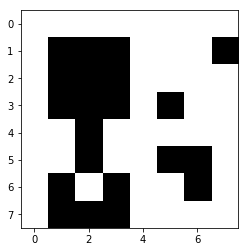

步驟三逐位元and運算:


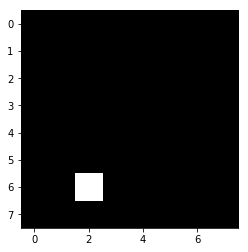

In [20]:
# 使用單純腐蝕方式實現
img_gray = np.array([[  0,   0,   0,   0,  0,   0,   0,   0],
                     [  0, 255, 255, 255,  0,   0,   0, 255],
                     [  0, 255, 255, 255,  0,   0,   0,   0],
                     [  0, 255, 255, 255,  0, 255,   0,   0],
                     [  0,   0, 255,   0,  0,   0,   0,   0],
                     [  0,   0, 255,   0,  0, 255, 255,   0],
                     [  0, 255,   0, 255,  0,   0, 255,   0],
                     [  0, 255, 255, 255,  0,   0,   0,   0]], dtype=np.uint8)

# img_gray = cv2.bitwise_not(img_gray, img_gray)

print('原圖:')
plt.imshow(img_gray, cmap = 'gray')
plt.show()

# 設定擊中區域
kernel_A = np.array([[0, 1, 0],
                     [1, 0, 1],
                     [0, 1, 0]], dtype = np.uint8)

erosion_1 = cv2.erode(img_gray, kernel_A)
print('步驟一腐蝕圖:')
plt.imshow(erosion_1, cmap = 'gray')
plt.show()

# 設定擊不中區域
kernel_B = np.array([[0, 0, 0],
                     [0, 1, 0],
                     [0, 0, 0]], dtype = np.uint8)

# 針對黑白反轉圖腐蝕
erosion_2 = cv2.erode(cv2.bitwise_not(img_gray, img_gray), kernel_B)
print('步驟二腐蝕圖:')
plt.imshow(erosion_2, cmap = 'gray')
plt.show()

img_hitmiss = cv2.bitwise_and(erosion_1, erosion_2)
print('步驟三逐位元and運算:')
plt.imshow(img_hitmiss, cmap = 'gray')
plt.show()

原圖:


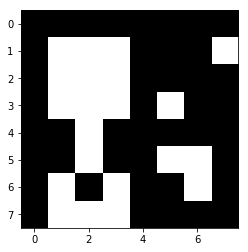

kernel:
 [[ 0  1  0]
 [ 1 -1  1]
 [ 0  1  0]]
hitmiss:


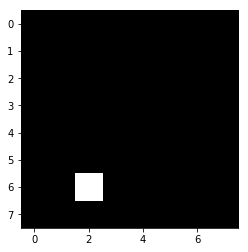

In [21]:
# 使用MORPH_HITMISS實現
img_gray = np.array([[  0,   0,   0,   0,  0,   0,   0,   0],
                     [  0, 255, 255, 255,  0,   0,   0, 255],
                     [  0, 255, 255, 255,  0,   0,   0,   0],
                     [  0, 255, 255, 255,  0, 255,   0,   0],
                     [  0,   0, 255,   0,  0,   0,   0,   0],
                     [  0,   0, 255,   0,  0, 255, 255,   0],
                     [  0, 255,   0, 255,  0,   0, 255,   0],
                     [  0, 255, 255, 255,  0,   0,   0,   0]], dtype=np.uint8)
# 擊中區域為>0整數，擊不中區域為-1，注意不能設定dtype = np.uint8，否則不能設定-1
kernel = np.array([[0, 1, 0],
                   [1, -1, 1],
                   [0, 1, 0]])
morph_hitmiss = cv2.morphologyEx(img_gray, cv2.MORPH_HITMISS, kernel)
print('原圖:')
plt.imshow(img_gray, cmap = 'gray')
plt.show()
print('kernel:\n', kernel)
print('hitmiss:')
plt.imshow(morph_hitmiss, cmap = 'gray')
plt.show()

## 核函數

在先前的例子中，我們都是使用自己手動創建的kernel，在OpenCV中也有函式`cv2.getStructuringElement()`能讓我們快速新建kernel:

`retval = cv2.getStructuringElement(shape, ksize[, anchor])`

其中shape代表形狀類型，ksize為kernel大小，anchor為核函數錨點位置，也就是修改像素值的位置(預設為核函數的中心點)。

op操作類型有以下數種:

`cv2.MORPH_RECT`:矩形結構，所有元素都為1。

`cv2.MORPH_CROSS`:十字形結構，中心十字線元素為1。

`cv2.MORPH_ELLIPSE`:橢圓結構。

In [22]:
# 看看不同核函數的樣子
kernel_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))
kernel_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

print('kernel_rect:\n', kernel_rect)
print('kernel_cross:\n', kernel_cross)
print('kernel_ellipse:\n', kernel_ellipse)

kernel_rect:
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
kernel_cross:
 [[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]
kernel_ellipse:
 [[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


原圖:


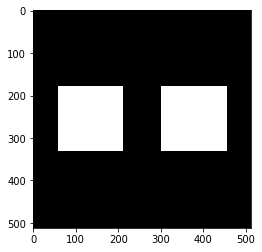

kernel_rect:


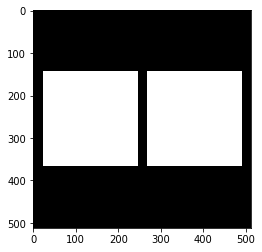

kernel_cross:


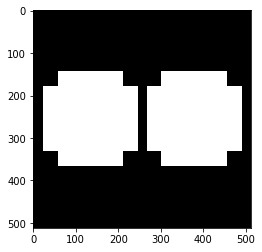

kernel_ellipse:


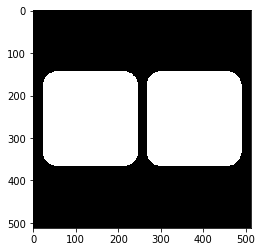

In [23]:
# 使用不同核函數進行膨脹運算
# 自訂一張的二值化圖片(通道數為一)
img_gray = cv2.imread('data/two_box.png', 0)

kernel_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (70, 70))
kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (70, 70))
kernel_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (70, 70))

dilation_rect = cv2.dilate(img_gray, kernel_rect)
dilation_cross = cv2.dilate(img_gray, kernel_cross)
dilation_ellipse = cv2.dilate(img_gray, kernel_ellipse)

print('原圖:')
plt.imshow(img_gray, cmap = 'gray')
plt.show()
print('kernel_rect:')
plt.imshow(dilation_rect, cmap = 'gray')
plt.show()
print('kernel_cross:')
plt.imshow(dilation_cross, cmap = 'gray')
plt.show()
print('kernel_ellipse:')
plt.imshow(dilation_ellipse, cmap = 'gray')
plt.show()